# inflearn 단 두장의 문서로 데이터 분석과 시각화 뽀개기
* youtube todaycode오늘코드 박조은 강사님
* https://www.inflearn.com/course/%ED%8C%90%EB%8B%A4%EC%8A%A4-pandas
* https://github.com/corazzon/cracking-the-pandas-cheat-sheet 

## DataFrame & Series

In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame(
    {"a" : [4,5,6],
     "b" : [7,8,9],
     "c" : [10,11,12]},
    index = [1,2,3])
df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [3]:
df = pd.DataFrame([[4,5,6],
                  [7,8,9],
                  [10,11,12]],
                  index = [1,2,3],
                  columns = ["a","b","c"])
df

,a,b,c
1,4,5,6
2,7,8,9
3,10,11,12


In [4]:
df = pd.DataFrame(
                {"a" : [4 ,5, 6],
                "b" : [7, 8, 9],
                "c" : [10, 11, 12]},
                index = pd.MultiIndex.from_tuples(
                [('d',1),('d',2),('e',2)],
                names=['n','v']))
df

a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12

## Subset Observations (Rows)

In [5]:
df.b>7

n  v
d  1    False
   2     True
e  2     True
Name: b, dtype: bool

In [6]:
df[df.b>7]

,,a,b,c
n,v,,,
d,2,5,8,11
e,2,6,9,12


In [7]:
df[df['c']>=7]

a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12

In [8]:
df[df['c']<=7]

,,a,b,c
n,v,,,


In [9]:
df = pd.DataFrame(
                {"a" : [4 ,5, 6,6],
                "b" : [7, 8, 9,9],
                "c" : [10, 11, 12,12]},
                index = pd.MultiIndex.from_tuples(
                [('d',1),('d',2),('e',2),('e',3)],
                names=['n','v']))
df

a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12
  3  6  9  12

In [10]:
df.drop_duplicates() #모든 컬럼의 인덱스 값이 동일한 행이 있을 경우 삭제
#해당 결과를 저장하기 위해 (infplcae=True) 할 경우 df가 변경되지만 해당 기능은 곧 중지 예정이고, 다시 변수에 할당하여 저장하는 방식을 권장
df = df.drop_duplicates(keep = 'first')
#keep을 first, last 등으로 바꿔주면 중복 행에서 어떤 행을 남겨둘 지 선택

In [11]:
df[df.a !=5]

,,a,b,c
n,v,,,
d,1,4,7,10
e,2,6,9,12


In [12]:
df.a.isin([4])

n  v
d  1     True
   2    False
e  2    False
Name: a, dtype: bool

In [13]:
import numpy as np
df = pd.DataFrame(
                {"a" : [4 ,5, 6,6, np.nan],
                "b" : [7, 8, 9,9, np.nan],
                "c" : [10, 11, 12,np.nan,12]},
                index = pd.MultiIndex.from_tuples(
                [('d',1),('d',2),('e',2),('e',3),('e',4)],
                names=['n','v']))
df

a    b     c
n v                
d 1  4.0  7.0  10.0
  2  5.0  8.0  11.0
e 2  6.0  9.0  12.0
  3  6.0  9.0   NaN
  4  NaN  NaN  12.0

In [14]:
pd.isnull(df)

a      b      c
n v                     
d 1  False  False  False
  2  False  False  False
e 2  False  False  False
  3  False  False   True
  4   True   True  False

In [15]:
df['a'].isnull()

n  v
d  1    False
   2    False
e  2    False
   3    False
   4     True
Name: a, dtype: bool

In [16]:
pd.notnull(df) # = df.notnull()

a      b      c
n v                     
d 1   True   True   True
  2   True   True   True
e 2   True   True   True
  3   True   True  False
  4  False  False   True

In [17]:
df['a'].notnull()

n  v
d  1     True
   2     True
e  2     True
   3     True
   4    False
Name: a, dtype: bool

* (expression) &,|,~,^,df.any(),df.all()
* (Logical) and, or, not, xor, any, all

In [18]:
~df.notnull()

a      b      c
n v                     
d 1  False  False  False
  2  False  False  False
e 2  False  False  False
  3  False  False   True
  4   True   True  False

In [19]:
# python에선 and 또는 or로 사용하지만 pandas에선 사용 불가 ==> 대체 '&', '|'
df[df.a==7] | df[df.b==5]

,,a,b,c
n,v,,,


In [20]:
df.sample(frac = 0.7) #Dataframe에서 특정 비율로 데이터를 가져옴

a    b     c
n v                
d 2  5.0  8.0  11.0
  1  4.0  7.0  10.0
e 2  6.0  9.0  12.0
  3  6.0  9.0   NaN

In [21]:
# np.random.seed(1234) #샘플을 동일한 규칙으로 가져오고자 할 경우 시드 지정
df.sample(n = 2) #Dataframe에서 특정 개수만큼 데이터를 샘플링함

a    b     c
n v                
e 3  6.0  9.0   NaN
  2  6.0  9.0  12.0

In [22]:
df = pd.DataFrame(
                {"a" : [4 ,5, 6,6, 10],
                "b" : [7, 8, 9,9, np.nan],
                "c" : [10, 11, 12,np.nan,12]},
                index = pd.MultiIndex.from_tuples(
                [('d',1),('d',2),('e',2),('e',3),('e',4)],
                names=['n','v']))

In [23]:
df.nlargest(3,'a') #연속형인 컬럼 기준에서 값이 가장 큰, 상위 3개 가져오기

a    b     c
n v               
e 4  10  NaN  12.0
  2   6  9.0  12.0
  3   6  9.0   NaN

In [24]:
df.nsmallest(3,'a') #연속형인 컬럼 기준에서 값이 가장 작은, 하위 3개 가져오기

a    b     c
n v              
d 1  4  7.0  10.0
  2  5  8.0  11.0
e 2  6  9.0  12.0

## Subset Variables (Columns)

In [25]:
import pandas as pd
import seaborn as sns #iris dataset을 가져오기 위해 라이브러리 호출

In [26]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [27]:
columns = ['sepal_length','sepal_width','species']
df[columns].head()

,sepal_length,sepal_width,species
0,5.1,3.5,setosa
1,4.9,3.0,setosa
2,4.7,3.2,setosa
3,4.6,3.1,setosa
4,5.0,3.6,setosa


In [28]:
df.filter(regex = "length$").head(3)

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3


In [29]:
df.filter(regex = "^sepal").head(3)

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2


In [30]:
df.filter(regex = "_")

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [31]:
df.filter(regex = "^es||se$")
# | 1개 : and , || 2개 : or
# es로 끝나거나, se로 시작되는 컬럼

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [32]:
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [33]:
df.filter(regex = '^(?!species$).*').head(3)
# ^ 아무문자 다음 특정 패턴이 존재한 경우 검색 ex) '^sepal' => sepal로 시작되는 모든 컬럼 검색
# sepcies$ => species로 끝나는 모든 컬럼 검색
# ^(?!species$) => species로 끝나는 문자가 아닌 것 중 ^.* 전체

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [34]:
df.loc[:5, 'sepal_width':'petal_width'] #df.loc[행 , 열]
#df.iloc => 인덱스 순서로 가져옴
# 단, iloc는 콜론 뒤의 인덱스는 포함 안함
# ex) df.loc[:4] => 0,1,2,3,4행 / df,iloc[:4] => 0,1,2,3행

,sepal_width,petal_length,petal_width
0,3.5,1.4,0.2
1,3.0,1.4,0.2
2,3.2,1.3,0.2
3,3.1,1.5,0.2
4,3.6,1.4,0.2
5,3.9,1.7,0.4


In [35]:
df.iloc[:5,:]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Summarize Data

In [36]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('iris')
df.shape

(150, 5)

In [37]:
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [38]:
df['species'].value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

In [39]:
print(df.shape, len(df))
# df.shape df의 형태 n x p
# len(df) df의 행 개수 n


(150, 5) 150


In [40]:
df['species'].nunique() #unique한 개수를 카운트

3

In [41]:
df.describe() #수치형 데이터의 기술통계량을 보여줌
#include = 'all' 하면 데이터 형태와 상관없이 모든 컬럼 다 가져옴

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### apply

In [42]:
# df.apply?
df.apply(lambda x : x[1])

sepal_length       4.9
sepal_width          3
petal_length       1.4
petal_width        0.2
species         setosa
dtype: object

In [43]:
df.species.apply(lambda x : x[:3])

0      set
1      set
2      set
3      set
4      set
      ... 
145    vir
146    vir
147    vir
148    vir
149    vir
Name: species, Length: 150, dtype: object

In [44]:
def smp(x):
    #뒤에서 3번째까지 문자 가져오기
    x = x[-3:]
    return x

In [45]:
df.species.apply(lambda x : smp(x))

0      osa
1      osa
2      osa
3      osa
4      osa
      ... 
145    ica
146    ica
147    ica
148    ica
149    ica
Name: species, Length: 150, dtype: object

## Handling Missing Data

In [46]:
df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman'],
                   "toy": [np.nan, 'Batmobile', 'Bullwhip'],
                   "born": [pd.NaT, pd.Timestamp("1940-04-25"),pd.NaT]})
df

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [47]:
df.dropna()

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [48]:
df.fillna(0)

,name,toy,born
0,Alfred,0,0
1,Batman,Batmobile,1940-04-25 00:00:00
2,Catwoman,Bullwhip,0


In [49]:
df

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


## Make New Columns

In [50]:
import pandas as pd

In [51]:
df = pd.DataFrame({'temp_c': [17.0, 25.0]},
                  index=['Portland', 'Berkeley'])
df

,temp_c
Portland,17.0
Berkeley,25.0


In [52]:
df = df.assign(temp_f=lambda x: x.temp_c * 9 / 5 + 32)
df = df.assign(temp_ff=df['temp_c'] * 9 / 5 + 32)
df['temp_fff'] = df['temp_c'] * 9 / 5 + 32
df

,temp_c,temp_f,temp_ff,temp_fff
Portland,17.0,62.6,62.6,62.6
Berkeley,25.0,77.0,77.0,77.0


In [53]:
pd.qcut(df.temp_f, 3, labels=["good", "medium", "bad"])
# 숫자형 데이터를 범주형 데이터로 전환해줄 때 사용
# num(ex 3)에 따라 범주 개수를 선정하고, labeling

Portland    good
Berkeley     bad
Name: temp_f, dtype: category
Categories (3, object): [good < medium < bad]

In [54]:
# df = pd.DataFrame({'test' : np.random.randint(10, size = 9)})
df[::2] = df[::2]*(-1)
df

,temp_c,temp_f,temp_ff,temp_fff
Portland,-17.0,-62.6,-62.6,-62.6
Berkeley,25.0,77.0,77.0,77.0


In [55]:
df.clip(lower = -5, upper = 5)

,temp_c,temp_f,temp_ff,temp_fff
Portland,-5.0,-5.0,-5.0,-5.0
Berkeley,5.0,5.0,5.0,5.0


In [56]:
df.temp_c.abs()

Portland    17.0
Berkeley    25.0
Name: temp_c, dtype: float64

## Reshaping Data

In [57]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset("mpg")
df.shape

(398, 9)

In [58]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [59]:
df.sort_values("mpg")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
28,9.0,8,304.0,193.0,4732,18.5,70,usa,hi 1200d
25,10.0,8,360.0,215.0,4615,14.0,70,usa,ford f250
26,10.0,8,307.0,200.0,4376,15.0,70,usa,chevy c20
103,11.0,8,400.0,150.0,4997,14.0,73,usa,chevrolet impala
124,11.0,8,350.0,180.0,3664,11.0,73,usa,oldsmobile omega
...,...,...,...,...,...,...,...,...,...
326,43.4,4,90.0,48.0,2335,23.7,80,europe,vw dasher (diesel)
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
325,44.3,4,90.0,48.0,2085,21.7,80,europe,vw rabbit c (diesel)
329,44.6,4,91.0,67.0,1850,13.8,80,japan,honda civic 1500 gl


In [60]:
df.sort_values("mpg",ascending = False).head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
322,46.6,4,86.0,65.0,2110,17.9,80,japan,mazda glc
329,44.6,4,91.0,67.0,1850,13.8,80,japan,honda civic 1500 gl
325,44.3,4,90.0,48.0,2085,21.7,80,europe,vw rabbit c (diesel)
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
326,43.4,4,90.0,48.0,2335,23.7,80,europe,vw dasher (diesel)


In [61]:
df = df.rename(columns = {'model_year' : 'year'})
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [62]:
df.sort_index()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [63]:
df.reset_index()

,index,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...,...
393,393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [64]:
df.drop(columns = ['mpg','year'])

,cylinders,displacement,horsepower,weight,acceleration,origin,name
0,8,307.0,130.0,3504,12.0,usa,chevrolet chevelle malibu
1,8,350.0,165.0,3693,11.5,usa,buick skylark 320
2,8,318.0,150.0,3436,11.0,usa,plymouth satellite
3,8,304.0,150.0,3433,12.0,usa,amc rebel sst
4,8,302.0,140.0,3449,10.5,usa,ford torino
...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,usa,ford mustang gl
394,4,97.0,52.0,2130,24.6,europe,vw pickup
395,4,135.0,84.0,2295,11.6,usa,dodge rampage
396,4,120.0,79.0,2625,18.6,usa,ford ranger


In [65]:
df = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},
                   'B': {0: 1, 1: 3, 2: 5},
                   'C': {0: 2, 1: 4, 2: 6}})
df

,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


In [66]:
pd.melt(df, id_vars = ['A','C'], value_vars = ['B']) #spred func in r

,A,C,variable,value
0,a,2,B,1
1,b,4,B,3
2,c,6,B,5


In [67]:
pd.melt(df, id_vars = ['A'], value_vars = ['B','C'])

,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5
3,a,C,2
4,b,C,4
5,c,C,6


In [68]:
pd.melt(df, value_vars = ['A','B','C']).rename(columns = {'variable' : 'var', 'value' : 'val'})

,var,val
0,A,a
1,A,b
2,A,c
3,B,1
4,B,3
5,B,5
6,C,2
7,C,4
8,C,6


In [69]:
df2 = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two','two'],
                   'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'baz': [1, 2, 3, 4, 5, 6],
                   'zoo': ['x', 'y', 'z', 'q', 'w', 't']})
df2

,foo,bar,baz,zoo
0,one,A,1,x
1,one,B,2,y
2,one,C,3,z
3,two,A,4,q
4,two,B,5,w
5,two,C,6,t


In [70]:
df3 = df2.pivot(index = 'foo', columns = 'bar', values = 'baz').reset_index()
df3

bar,foo,A,B,C
0,one,1,2,3
1,two,4,5,6


In [71]:
df3.melt(id_vars = ['foo'], value_vars = ['A','B','C']).sort_values(['foo', 'bar']).rename(columns = {'value' : 'baz'})

,foo,bar,baz
0,one,A,1
2,one,B,2
4,one,C,3
1,two,A,4
3,two,B,5
5,two,C,6


In [72]:
s1 = pd.Series(['a','b'])
s1

0    a
1    b
dtype: object

In [73]:
s2 = pd.Series(['c','d'])
s2

0    c
1    d
dtype: object

In [74]:
pd.concat([s1,s2], ignore_index = True) #rbind in r

0    a
1    b
2    c
3    d
dtype: object

In [75]:
pd.concat([s1,s2], keys = ['s1','s2',], names = ['Series name','Row ID'])

Series name  Row ID
s1           0         a
             1         b
s2           0         c
             1         d
dtype: object

In [76]:
df1 = pd.DataFrame([['a', 1], ['b', 2]],
                   columns=['letter', 'number'])
df1

,letter,number
0,a,1
1,b,2


In [77]:
df2 = pd.DataFrame([['c', 3], ['d', 4]],
                   columns=['letter', 'number'])
df2

,letter,number
0,c,3
1,d,4


In [78]:
pd.concat([df1,df2])

,letter,number
0,a,1
1,b,2
0,c,3
1,d,4


In [79]:
df3 = pd.DataFrame([['c', 3, 'cat'], ['d', 4, 'dog']],
                   columns=['letter', 'number', 'animal'])
df3

,letter,number,animal
0,c,3,cat
1,d,4,dog


In [80]:
pd.concat([df1,df2,df3])

,letter,number,animal
0,a,1,NaN
1,b,2,NaN
0,c,3,NaN
1,d,4,NaN
0,c,3,cat
1,d,4,dog


In [81]:
pd.concat([df1,df2,df3], join = 'inner')

,letter,number
0,a,1
1,b,2
0,c,3
1,d,4
0,c,3
1,d,4


In [82]:
df4 = pd.DataFrame([['bird', 'polly'], ['monkey', 'george']],
                   columns=['animal', 'name'])
df4

,animal,name
0,bird,polly
1,monkey,george


In [83]:
df5 = pd.DataFrame([1], index=['a'])
df5

,0
a,1


In [84]:
df6 = pd.DataFrame([2], index=['a'])
df6

,0
a,2


In [86]:
pd.concat([df5,df6],verify_integrity=True)
#verify_integrity를 True로 하면 합칠 때 중복값이 있으면 에러 표시
#df5와 df6의 행 이름이 중복

ValueError: Indexes have overlapping values: Index(['a'], dtype='object')

## Combine Data Sets

In [87]:
import pandas as pd

In [88]:
adf = pd.DataFrame({"x1" : ["A","B","C"], "x2" : [1,2,3]})
adf

,x1,x2
0,A,1
1,B,2
2,C,3


In [89]:
bdf = pd.DataFrame({"x1" : ["A","B","D"], "x3" : ["T","F","T"]})
bdf

,x1,x3
0,A,T
1,B,F
2,D,T


In [90]:
pd.merge(adf,bdf, how = 'left', on = 'x1')

,x1,x2,x3
0,A,1,T
1,B,2,F
2,C,3,NaN


In [91]:
pd.merge(adf,bdf, how = 'right', on = 'x1')

,x1,x2,x3
0,A,1.0,T
1,B,2.0,F
2,D,NaN,T


In [92]:
pd.merge(adf,bdf, how = 'inner', on = 'x1')

,x1,x2,x3
0,A,1,T
1,B,2,F


In [94]:
pd.merge(adf,bdf, how = 'outer', on = 'x1')

,x1,x2,x3
0,A,1.0,T
1,B,2.0,F
2,C,3.0,NaN
3,D,NaN,T


In [95]:
adf[adf.x1.isin(bdf.x1)]

,x1,x2
0,A,1
1,B,2


In [104]:
adf[adf.x1.isin(bdf.x1)]

,x1,x2
0,A,1
1,B,2


In [107]:
adf[~adf.x1.isin(bdf.x1)]

,x1,x2
2,C,3


In [108]:
ydf = pd.DataFrame({"x1" : ["A","B","C"], "x2" : [1,2,3]})
ydf

,x1,x2
0,A,1
1,B,2
2,C,3


In [109]:
zdf = pd.DataFrame({"x1" : ["B","C","D"], "x2" : [2,3,4]})
zdf

,x1,x2
0,B,2
1,C,3
2,D,4


In [111]:
pd.merge(ydf,zdf)

,x1,x2
0,B,2
1,C,3


In [113]:
pd.merge(ydf,zdf,how = 'outer')

,x1,x2
0,A,1
1,B,2
2,C,3
3,D,4


In [120]:
pd.merge(ydf, zdf, how='outer',
indicator=True).query('_merge == "left_only"').drop(columns=['_merge'])

,x1,x2
0,A,1


## Group Data

In [126]:
import pandas as pd
import seaborn as sns

In [129]:
df = sns.load_dataset("mpg")
df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite


In [133]:
df.groupby("origin").count()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,name
origin,,,,,,,,
europe,70,70,70,68,70,70,70,70
japan,79,79,79,79,79,79,79,79
usa,249,249,249,245,249,249,249,249


In [138]:
pd.DataFrame(df.groupby(["model_year","origin"])['cylinders'].mean())

cylinders
model_year origin           
70         europe   4.000000
           japan    4.000000
           usa      7.636364
71         europe   4.000000
           japan    4.000000
           usa      6.200000
72         europe   4.000000
           japan    3.800000
           usa      6.888889
73         europe   4.000000
           japan    4.250000
           usa      7.241379
74         europe   4.000000
           japan    4.000000
           usa      6.266667
75         europe   4.000000
           japan    4.000000
           usa      6.400000
76         europe   4.250000
           japan    4.500000
           usa      6.363636
77         europe   4.000000
           japan    4.166667
           usa      6.222222
78         europe   4.833333
           japan    4.000000
           usa      6.000000
79         europe   4.250000
           japan    4.000000
           usa      6.260870
80         europe   4.111111
           japan    4.076923
           usa      4.285714
81         europe   4.500000
           japan    4.333333
           usa      4.923077
82         europe   4.000000
           japan    4.000000
           usa      4.300000

In [163]:
df2 = pd.DataFrame(
        {"a" : [4 ,5, 6],
        "b" : [7, 11, 9],
        "c" : [10, 11, 12]})
df2

,a,b,c
0,4,7,10
1,5,11,11
2,6,9,12


In [164]:
df2.shift(2)

,a,b,c
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,4.0,7.0,10.0


In [165]:
df['model_year'].rank(method = 'min').value_counts()

86.0     40
245.0    36
183.0    34
368.0    31
153.0    30
339.0    29
281.0    29
310.0    29
1.0      29
217.0    28
58.0     28
30.0     28
126.0    27
Name: model_year, dtype: int64

In [166]:
df['model_year'].rank(pct = True).head()

0    0.037688
1    0.037688
2    0.037688
3    0.037688
4    0.037688
Name: model_year, dtype: float64

In [167]:
df['model_year'].rank(method = 'first').head()

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
Name: model_year, dtype: float64

In [168]:
df2

,a,b,c
0,4,7,10
1,5,11,11
2,6,9,12


In [169]:
df2.cumsum()

,a,b,c
0,4,7,10
1,9,18,21
2,15,27,33


In [173]:
df2.cummax() #cummax는 최대값을 출력해주는 함수로 [2,b] 값은 9이고, [1,b]는 11이니 높은 값인 11로 값이 바뀌는 것을 확인할 수 있음

,a,b,c
0,4,7,10
1,5,11,11
2,6,11,12


In [174]:
df2.cummin()

,a,b,c
0,4,7,10
1,4,7,10
2,4,7,10


In [175]:
df2.cumprod() #곱하기

,a,b,c
0,4,7,10
1,20,77,110
2,120,693,1320


## 시계열 데이터 분석 Windows

* https://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.expanding.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.rolling.html

In [19]:
import pandas as pd
import numpy as np
# %matplotlib inline
# matlplotlib inline을 하지 않으면 노트북 상에서 그래프가 표시되지 않는다하지만 실제론 되긴 함... 버전 바뀐듯

In [24]:
np.random.seed(1234)
s = pd.Series(np.random.randn(1000),
              index = pd.date_range('1/1/2015',periods = 1000))
s

2015-01-01    0.471435
2015-01-02   -1.190976
2015-01-03    1.432707
2015-01-04   -0.312652
2015-01-05   -0.720589
                ...   
2017-09-22    0.272164
2017-09-23    0.931546
2017-09-24    0.327532
2017-09-25    0.740814
2017-09-26   -0.801905
Freq: D, Length: 1000, dtype: float64

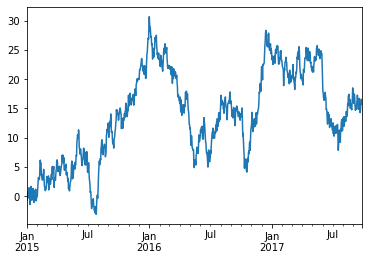

In [25]:
s = s.cumsum()
s.plot()

In [26]:
s

2015-01-01     0.471435
2015-01-02    -0.719541
2015-01-03     0.713166
2015-01-04     0.400515
2015-01-05    -0.320074
                ...    
2017-09-22    14.542595
2017-09-23    15.474141
2017-09-24    15.801673
2017-09-25    16.542487
2017-09-26    15.740582
Freq: D, Length: 1000, dtype: float64

In [49]:
r = s.rolling(window = 30)
#window = n에서 n = 10이면, 데이터 10개 인덱스의 평균을 계산하므로, 상위 9개는 NaN 출력
# 주가 이평선과 같은 것
r.mean()

2015-01-01          NaN
2015-01-02          NaN
2015-01-03          NaN
2015-01-04          NaN
2015-01-05          NaN
                ...    
2017-09-22    15.861432
2017-09-23    15.851346
2017-09-24    15.873397
2017-09-25    15.920671
2017-09-26    15.954141
Freq: D, Length: 1000, dtype: float64

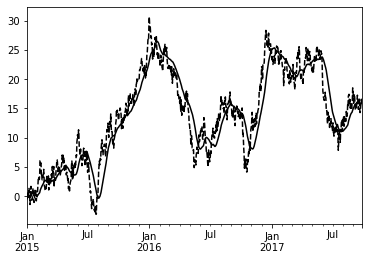

In [51]:
#이동평균
s.plot(style = 'k--')
r.mean().plot(style = 'k')

In [60]:
np.random.seed(1234)
df = pd.DataFrame(np.random.randn(1000,4),
                  index = pd.date_range('1/1/2015', periods = 1000),
                  columns = ['A','B','C','D'])
df

,A,B,C,D
2015-01-01,0.471435,-1.190976,1.432707,-0.312652
2015-01-02,-0.720589,0.887163,0.859588,-0.636524
2015-01-03,0.015696,-2.242685,1.150036,0.991946
2015-01-04,0.953324,-2.021255,-0.334077,0.002118
2015-01-05,0.405453,0.289092,1.321158,-1.546906
...,...,...,...,...
2017-09-22,0.606620,1.446567,-0.691402,0.955149
2017-09-23,0.672142,-0.355116,-0.240102,0.232473
2017-09-24,0.525020,-0.012250,-0.484403,0.761125
2017-09-25,-0.307001,-0.215848,-0.750894,0.283353


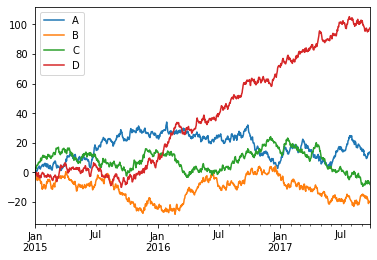

In [61]:
df = df.cumsum()
df.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000019FF20C0EB0>,
      dtype=object)

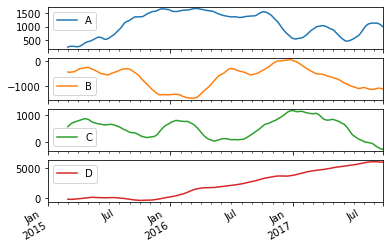

In [64]:
df.rolling(window=60).sum().plot(subplots=True)

In [65]:
#rolling은 window size에 만큼 값을 이동해서 평균을 구함
#expanding은 누적해서 값을 구함

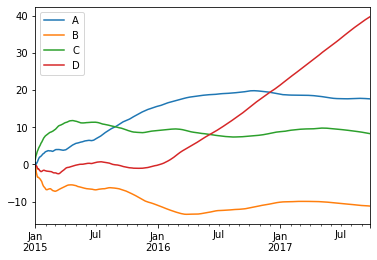

In [69]:
df.rolling(window = len(df), min_periods = 1).mean().plot()

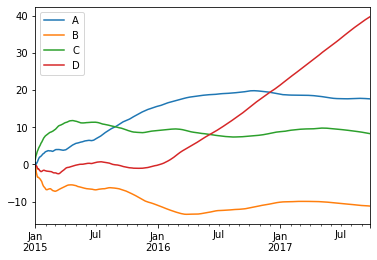

In [71]:
df.expanding(min_periods = 1).mean().plot()

In [84]:
df.rolling(window = 4).sum().head(10)

,A,B,C,D
2015-01-01,NaN,NaN,NaN,NaN
2015-01-02,NaN,NaN,NaN,NaN
2015-01-03,NaN,NaN,NaN,NaN
2015-01-04,0.708691,-8.609039,10.275587,-1.174168
2015-01-05,1.362577,-11.696724,13.272292,-2.363532
2015-01-06,2.534404,-16.327541,15.602830,-2.362935
2015-01-07,5.008687,-19.184978,17.458886,-5.171310
2015-01-08,6.346537,-18.962192,19.251180,-7.644366
2015-01-09,8.326512,-17.982559,20.586032,-8.692609
2015-01-10,10.633847,-16.669752,22.569138,-7.903329


In [80]:
df.head(10)

,A,B,C,D
2015-01-01,0.471435,-1.190976,1.432707,-0.312652
2015-01-02,-0.249154,-0.303813,2.292295,-0.949175
2015-01-03,-0.233457,-2.546498,3.442331,0.042771
2015-01-04,0.719867,-4.567753,3.108254,0.044889
2015-01-05,1.125320,-4.278661,4.429412,-1.502017
2015-01-06,0.922674,-4.934630,4.622833,-0.948578
2015-01-07,2.240826,-5.403935,5.298387,-2.765605
2015-01-08,2.057717,-4.344966,4.900547,-2.428167
2015-01-09,3.105296,-3.299028,5.764264,-2.550259
2015-01-10,3.230009,-3.621823,6.605939,-0.159298


In [86]:
df.expanding(min_periods = 4).mean().head(10)

,A,B,C,D
2015-01-01,NaN,NaN,NaN,NaN
2015-01-02,NaN,NaN,NaN,NaN
2015-01-03,NaN,NaN,NaN,NaN
2015-01-04,0.177173,-2.152260,2.568897,-0.293542
2015-01-05,0.366802,-2.577540,2.941000,-0.535237
2015-01-06,0.459448,-2.970388,3.221305,-0.604127
2015-01-07,0.713930,-3.318038,3.518031,-0.912910
2015-01-08,0.881904,-3.446404,3.690846,-1.102317
2015-01-09,1.128947,-3.430029,3.921226,-1.263199
2015-01-10,1.339053,-3.449208,4.189697,-1.152809


## 데이터 시각화 Plotting 기능 활용하기
* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

In [120]:
import pandas as pd
import numpy as np

In [121]:
import matplotlib as mpl
import matplotlib.pyplot as plt
#matplotlib inline # 주피터노트북 상 그래프 보이기, 단 현재는 안써도 보임

#한글폰트 사용시 그래프에서 마이너스 폰트 깨지는 문제 대처
mpl.rcParams['axes.unicode_minus'] = False

### plot
kind : str
    The kind of plot to produce:

    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : area plot
    - 'pie' : pie plot
    - 'scatter' : scatter plot
    - 'hexbin' : hexbin plot.

In [122]:
np.random.seed(1234)
ts = pd.Series(np.random.randn(1000),
               index = pd.date_range('1/1/2000',periods = 1000))
ts

2000-01-01    0.471435
2000-01-02   -1.190976
2000-01-03    1.432707
2000-01-04   -0.312652
2000-01-05   -0.720589
                ...   
2002-09-22    0.272164
2002-09-23    0.931546
2002-09-24    0.327532
2002-09-25    0.740814
2002-09-26   -0.801905
Freq: D, Length: 1000, dtype: float64

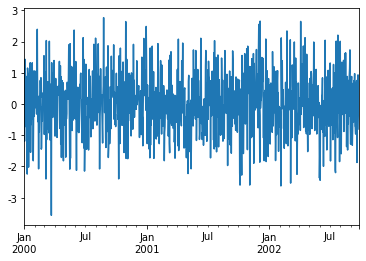

In [123]:
ts.plot()

In [124]:
ts = ts.cumsum()

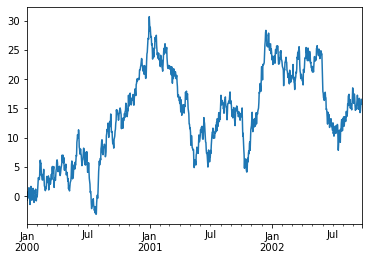

In [125]:
ts.plot()

In [126]:
np.random.seed(1234)
df = pd.DataFrame(np.random.randn(1000,4),
                  index = ts.index, columns = list('ABCD'))
df

,A,B,C,D
2000-01-01,0.471435,-1.190976,1.432707,-0.312652
2000-01-02,-0.720589,0.887163,0.859588,-0.636524
2000-01-03,0.015696,-2.242685,1.150036,0.991946
2000-01-04,0.953324,-2.021255,-0.334077,0.002118
2000-01-05,0.405453,0.289092,1.321158,-1.546906
...,...,...,...,...
2002-09-22,0.606620,1.446567,-0.691402,0.955149
2002-09-23,0.672142,-0.355116,-0.240102,0.232473
2002-09-24,0.525020,-0.012250,-0.484403,0.761125
2002-09-25,-0.307001,-0.215848,-0.750894,0.283353


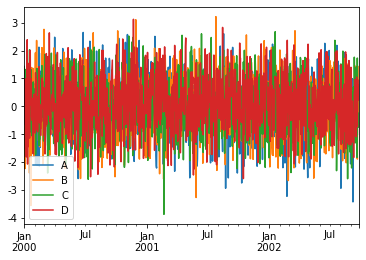

In [127]:
df.plot()

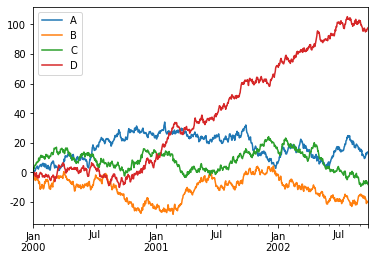

In [128]:
df = df.cumsum()
df.plot()

In [129]:
np.random.seed(1234)
df3 = pd.DataFrame(np.random.randn(1000,2),
                  columns = list('BC')).cumsum()

In [130]:
df3['A'] = pd.Series(list(range(len(df))))
df3

,B,C,A
0,0.471435,-1.190976,0
1,1.904142,-1.503628,1
2,1.183553,-0.616465,2
3,2.043142,-1.252988,3
4,2.058838,-3.495673,4
...,...,...,...
995,23.616717,29.947852,995
996,23.783219,28.704423,996
997,24.131799,29.337002,997
998,26.145180,30.118465,998


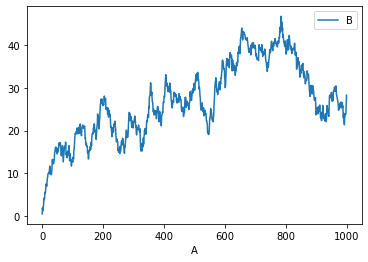

In [131]:
df3.plot(x = 'A', y = 'B')

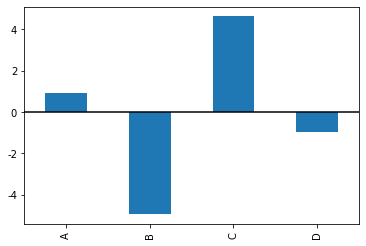

In [138]:
df.iloc[5].plot(kind = 'bar')
# = df.iloc[5].plot.bar()
plt.axhline(0, color = 'k')

In [154]:
np.random.seed(1234)
df2 = pd.DataFrame(np.random.randn(10,4), columns = ['a','b','c','d']).abs()
df2

,a,b,c,d
0,0.471435,1.190976,1.432707,0.312652
1,0.720589,0.887163,0.859588,0.636524
2,0.015696,2.242685,1.150036,0.991946
3,0.953324,2.021255,0.334077,0.002118
4,0.405453,0.289092,1.321158,1.546906
5,0.202646,0.655969,0.193421,0.553439
6,1.318152,0.469305,0.675554,1.817027
7,0.183109,1.058969,0.397840,0.337438
8,1.047579,1.045938,0.863717,0.122092
9,0.124713,0.322795,0.841675,2.390961


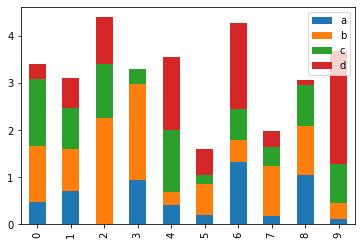

In [155]:
df2.plot.bar(stacked=True)

In [ ]:
df2.plot.barh(stacked=True)

* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#histograms

In [165]:
np.random.seed(1234)
df4 = pd.DataFrame({"a": np.random.randn(1000) + 1,
                    "b": np.random.randn(1000),
                    "c": np.random.randn(1000) - 1},
                   columns=["a", "b", "c"])
df4.head(3)

,a,b,c
0,1.471435,-1.582208,-2.187041
1,-0.190976,-1.620190,0.617082
2,2.432707,0.046562,-1.042681


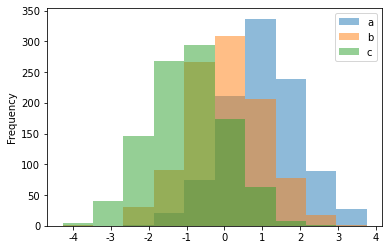

In [168]:
df4.plot.hist(alpha=0.5)

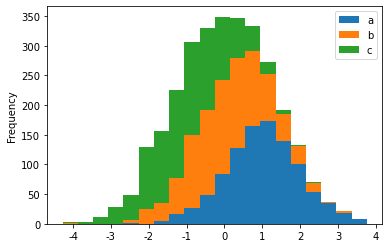

In [180]:
df4.plot.hist(stacked=True, bins=20)

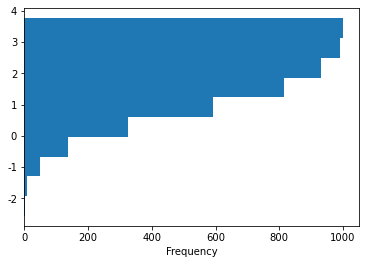

In [170]:
df4["a"].plot.hist(orientation="horizontal", cumulative=True)

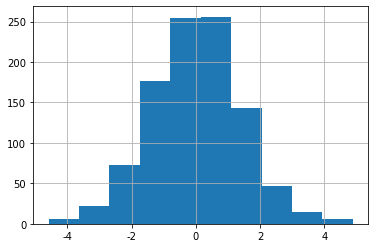

In [174]:
df4['a'].diff().hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019FFE47E280>,
      dtype=object)

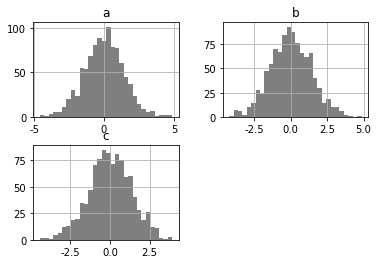

In [188]:
df4.diff().hist(color = 'k', alpha = 0.5, bins = 30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019FFE666CA0>,
      dtype=object)

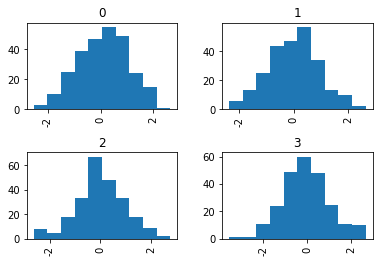

In [189]:
np.random.seed(1234)
data = pd.Series(np.random.randn(1000))
data.hist(by=np.random.randint(0, 4, 1000), figsize=(6, 4))

# == -> data.pd.Sereis({'a' : np.random.randn(1000),'b' : np.random.randint(0, 4, 1000)})
# == -> data['a'].hist(by = data.b, figsize = (6,4))

* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#box-plots

In [196]:
np.random.seed(1444)
df = pd.DataFrame(np.random.rand(10, 5), columns=["A", "B", "C", "D", "E"])
df.describe()

,A,B,C,D,E
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.305287,0.507688,0.328797,0.527442,0.456039
std,0.233402,0.329697,0.267361,0.319370,0.327650
min,0.045617,0.065196,0.045836,0.011503,0.024226
25%,0.200942,0.197174,0.090600,0.305152,0.228253
50%,0.257559,0.562033,0.300605,0.596716,0.453742
75%,0.339962,0.804017,0.478465,0.725998,0.635346
max,0.821304,0.906924,0.762390,0.953815,0.987798


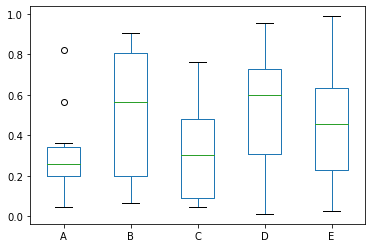

In [197]:
df.plot.box()

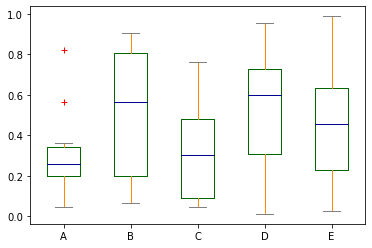

In [198]:
color = {"boxes": "DarkGreen",
         "whiskers": "DarkOrange", #수염 부분
         "medians": "DarkBlue",
         "caps": "Gray"}
df.plot.box(color = color, sym = 'r+')

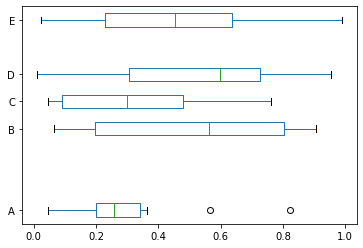

In [200]:
df.plot.box(vert=False, positions=[1, 4, 5, 6, 8])

In [201]:
np.random.seed(1234)
df = pd.DataFrame(np.random.rand(10, 5))
df

,0,1,2,3,4
0,0.191519,0.622109,0.437728,0.785359,0.779976
1,0.272593,0.276464,0.801872,0.958139,0.875933
2,0.357817,0.500995,0.683463,0.712702,0.370251
3,0.561196,0.503083,0.013768,0.772827,0.882641
4,0.364886,0.615396,0.075381,0.368824,0.933140
5,0.651378,0.397203,0.788730,0.316836,0.568099
6,0.869127,0.436173,0.802148,0.143767,0.704261
7,0.704581,0.218792,0.924868,0.442141,0.909316
8,0.059809,0.184287,0.047355,0.674881,0.594625
9,0.533310,0.043324,0.561433,0.329668,0.502967


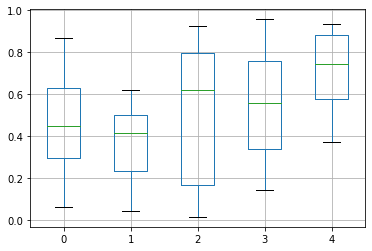

In [204]:
bp = df.boxplot()

In [205]:
df = pd.DataFrame(np.random.rand(10, 2), columns=["Col1", "Col2"])
df.head(2)

,Col1,Col2
0,0.111894,0.607194
1,0.565945,0.006764


In [206]:
df["X"] = pd.Series(["A", "A", "A", "A", "A", "B", "B", "B", "B", "B"])
df.head(2)

,Col1,Col2,X
0,0.111894,0.607194,A
1,0.565945,0.006764,A


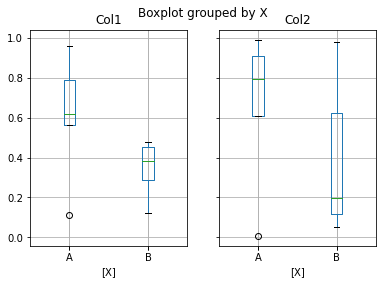

In [208]:
bp = df.boxplot(by="X")

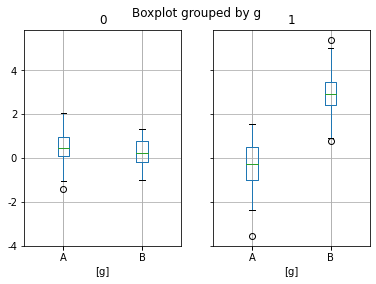

In [216]:
np.random.seed(1234)
df_box = pd.DataFrame(np.random.randn(50, 2))
df_box["g"] = np.random.choice(["A", "B"], size=50)
df_box.loc[df_box["g"] == "B", 1] += 3
bp = df_box.boxplot(by="g")

* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#area-plot

In [217]:
df = pd.DataFrame(np.random.rand(10, 4), columns=["a", "b", "c", "d"])
df.head(3)

,a,b,c,d
0,0.556895,0.084774,0.333002,0.728429
1,0.142435,0.552469,0.273043,0.974495
2,0.667787,0.255653,0.108311,0.776181


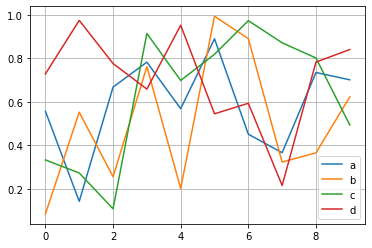

In [222]:
df.plot(grid = True)

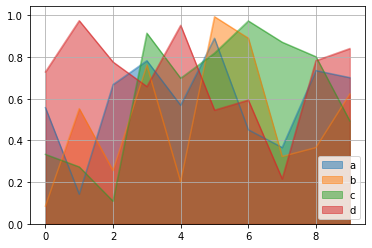

In [224]:
df.plot.area(stacked = False, grid = True)

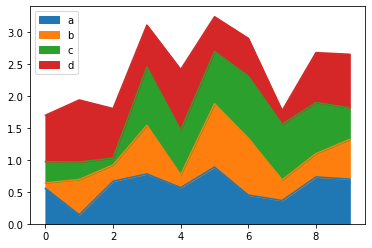

In [225]:
df.plot.area()

* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#scatter-plot

In [240]:
df = pd.DataFrame(np.random.rand(50, 4), columns=["a", "b", "c", "d"])
df.head(3)

,a,b,c,d
0,0.239971,0.535788,0.271467,0.034431
1,0.627086,0.520200,0.041956,0.757473
2,0.988350,0.801401,0.343981,0.335391


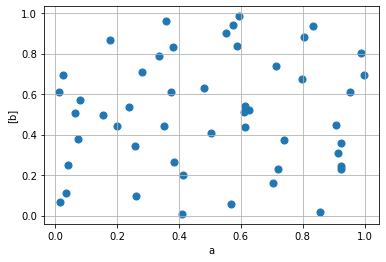

In [244]:
df.plot.scatter(x="a", y=["b"], s = 50, grid = True)

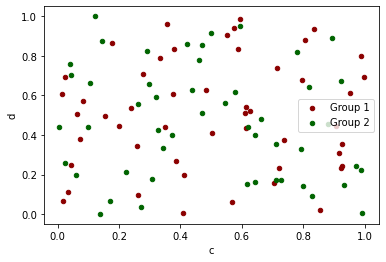

In [247]:
ax = df.plot.scatter(x="a", y="b", color="DarkRed", label="Group 1")
df.plot.scatter(x="c", y="d", color="DarkGreen", label="Group 2", ax=ax)

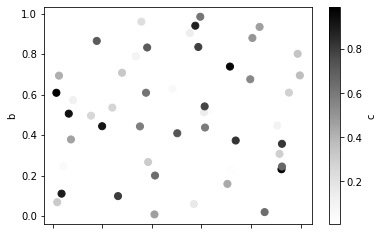

In [248]:
df.plot.scatter(x="a", y="b", c="c", s=50)

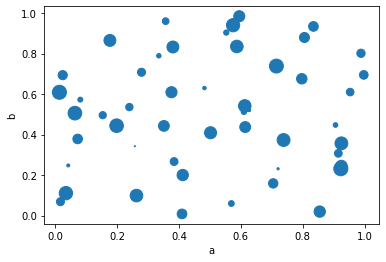

In [251]:
df.plot.scatter(x="a", y="b", s=df["c"] * 200)
#산점도 : 데이터 이상치, 분포, 연관관계 등을 볼 때 많이 사용

* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#hexagonal-bin-plot
* Hexbin plot은 데이터가 클 때 각각의 점을 산점도로 표현할 때의 단점을 보완

In [256]:
np.random.seed(1234)
df = pd.DataFrame(np.random.randn(1000, 2), columns=["a", "b"])
df["b"] = df["b"] + np.arange(1000) #np.arange : 0~999 번호
df.head(3)

,a,b
0,0.471435,-1.190976
1,1.432707,0.687348
2,-0.720589,2.887163


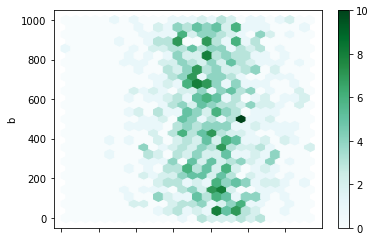

In [261]:
df.plot.hexbin(x="a", y="b", gridsize=25)
#scatter plot 대안, histplot과 유사하게 사용 가능

In [268]:
df["z"] = np.random.uniform(0, 3, 1000)
df.head(3)

,a,b,z
0,0.471435,-1.190976,1.435393
1,1.432707,0.687348,2.961566
2,-0.720589,2.887163,0.372317


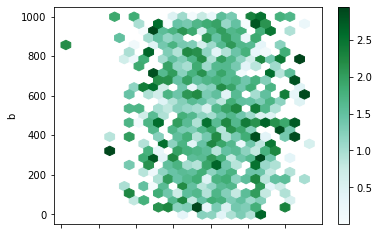

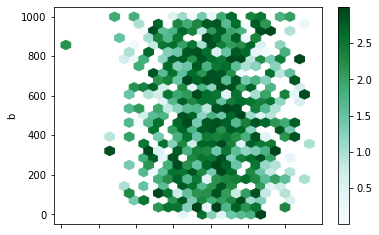

In [281]:
df.plot.hexbin(x="a", y="b", C="z", gridsize=25)
df.plot.hexbin(x="a", y="b", C="z", reduce_C_function=np.max, gridsize=25)

* reduce_C_function : 
기본적으로 각 (x,y)점 주변의 개수에 대해 히스토그램으로 계산됩니다. C 및 reduce_C_function 인수에 값을 전달하여 대체 집계를 지정할 수 있습니다. C는 각 (x,y)점에서 값을 지정하고 reduce_C_function은 빈의 모든 값을 단일 숫자(예 : 평균, 최대 값, 합계, 표준)로 줄이는 하나의 인수의 함수입니다. 이 예에서 위치는 열(column) a 및 b에 의해 주어지며 값은 열(z)에 의해 주어진다. 빈은 Numpy의 Max 함수로 집계됩니다.

* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#pie-plot

In [291]:
np.random.seed(1234)
series = pd.Series(3 * np.random.rand(4), index=["a", "b", "c", "d"], name="series")
series

a    0.574558
b    1.866326
c    1.313183
d    2.356076
Name: series, dtype: float64

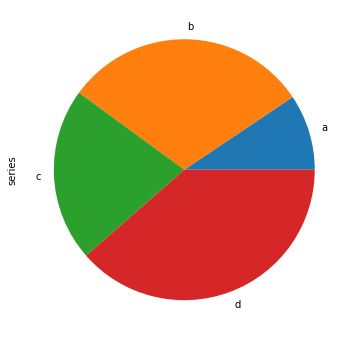

In [292]:
series.plot.pie(figsize=(6, 6))

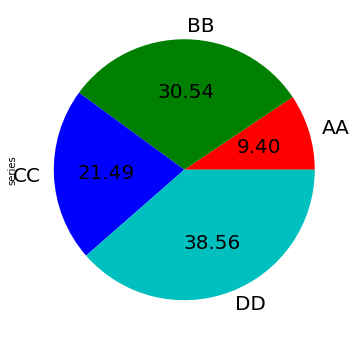

In [301]:
series.plot.pie(labels=["AA", "BB", "CC", "DD"],
                colors=["r", "g", "b", "c"],
                autopct="%.2f",
                fontsize=20,
                figsize=(6, 6))

In [302]:
df = pd.DataFrame({'mass': [0.330, 4.87 , 5.97],
                   'radius': [2439.7, 6051.8, 6378.1]},
                  index=['Mercury', 'Venus', 'Earth'])
df

,mass,radius
Mercury,0.33,2439.7
Venus,4.87,6051.8
Earth,5.97,6378.1


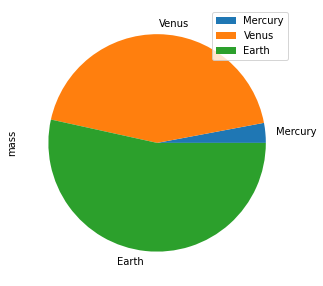

In [303]:
plot = df.plot.pie(y='mass', figsize=(5, 5))

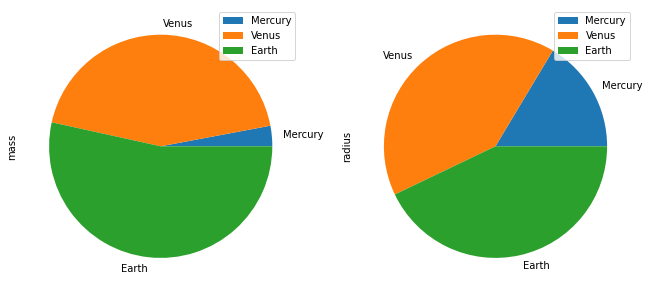

In [304]:
plot = df.plot.pie(subplots=True, figsize=(11, 6))

* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#scatter-matrix-plot

In [306]:
from pandas.plotting import scatter_matrix
df = pd.DataFrame(np.random.randn(1000, 4), columns=["a", "b", "c", "d"])
df.head()

,a,b,c,d
0,-0.004541,0.119074,-1.023548,2.175465
1,0.339052,0.575126,-1.681742,0.551767
2,-0.963786,0.910079,0.982752,-1.038906
3,-0.966813,0.836247,0.928455,-1.297852
4,-0.476916,0.353992,-0.187718,-0.029780


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019F85BA9280>,
      dtype=object)

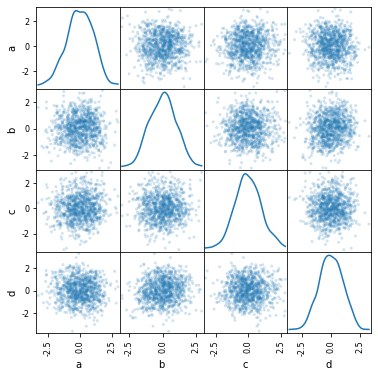

In [309]:
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal="kde")

* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#density-plot

In [310]:
np.random.seed(1234)
ser = pd.Series(np.random.randn(1000))
ser

0      0.471435
1     -1.190976
2      1.432707
3     -0.312652
4     -0.720589
         ...   
995    0.272164
996    0.931546
997    0.327532
998    0.740814
999   -0.801905
Length: 1000, dtype: float64

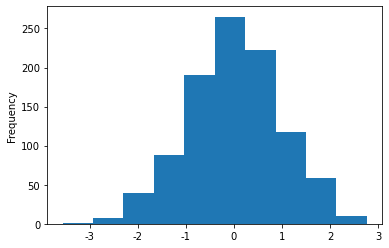

In [319]:
ser.plot.hist()

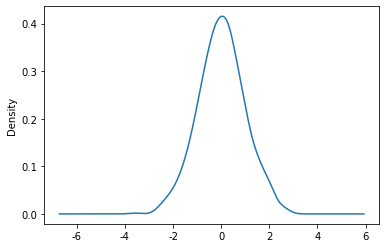

In [320]:
ser.plot.density() #  = ser.plot.kde()